# PD-regulation

$l_{crit} = \text{const}$ and $dt_{\text{update action}} = \text{const}$, so 

$$
    \begin{aligned}
        & \frac{dx_{jet}}{dt} = v_{jet} \\
        & \frac{dx^{rel}_{jet}}{dt} = v^{rel}_{jet} \\
    \end{aligned}
$$

Error $e=(1-x^{rel}_{jet})$, then

$$
    \frac{de}{dt} = - v^{rel}_{jet}
$$

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from src.scenario import SimulationScenario, PulseSimulationScenario
from src.system import HydraulicSystem
from src.simulator import Simulator
from src.policy import PDController, PulseController

data_path = './data'
os.path.isdir(data_path)

True

# Pulse-controller

Total objective: 2.26578


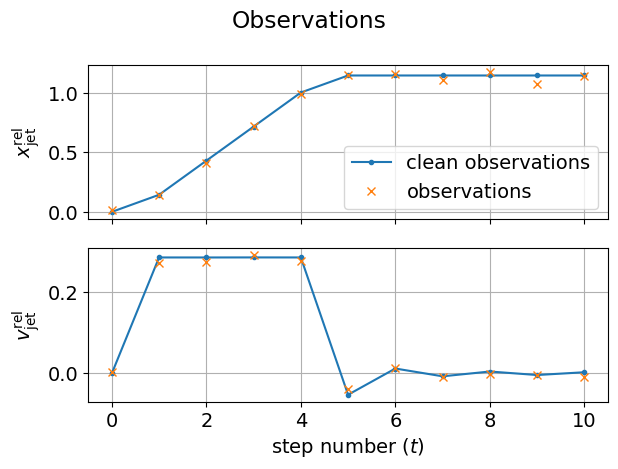

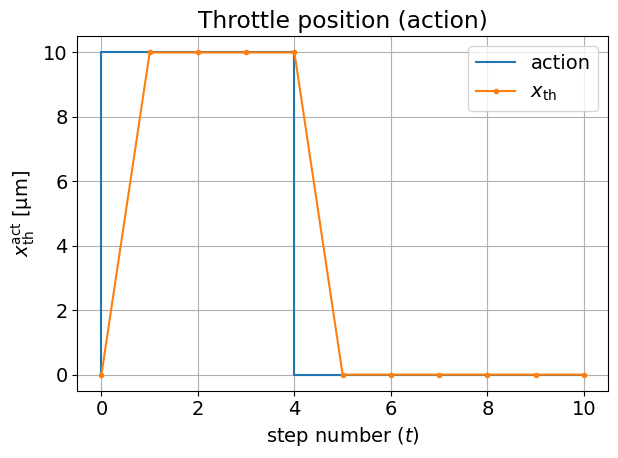

Relative jet length after the pulse: 1.145


In [11]:
system = HydraulicSystem(
    jet_length_std=5e-2,
    jet_velocity_std=1e-2,
)
simulator = Simulator(system, N_steps=10, state_init=np.array([1e3, 0]))
controller = PulseController(
    pulse_duration=4,
    pulse_amplitude=10.,
)

scenario = PulseSimulationScenario(
    simulator=simulator,
    policy=controller,
    root_data_path=data_path,
)

scenario.run()
scenario.plot_data(log_data=False)
print(f'Relative jet length after the pulse: {scenario.clean_observations[-1][0]:.3f}')

# PD-controller

Total objective: 2.76532


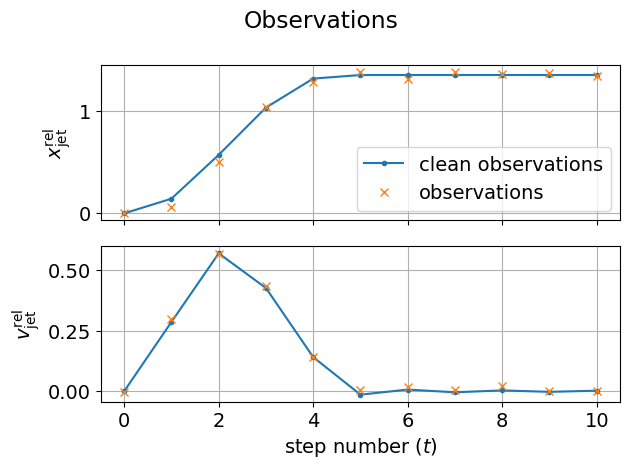

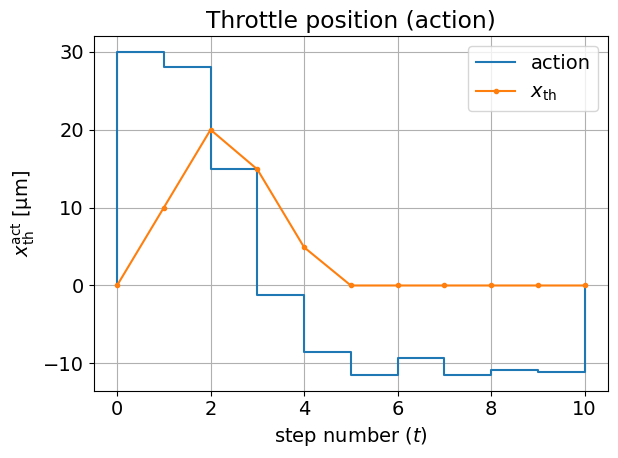

In [7]:
system = HydraulicSystem(
    jet_length_std=5e-2,
    jet_velocity_std=1e-2,
)
simulator = Simulator(system, N_steps=10, state_init=np.array([1e3, 0]))
controller = PDController(
    P_coef=30,
    D_coef=0,
)

scenario = SimulationScenario(
    simulator=simulator,
    policy=controller,
    root_data_path=data_path,
)

scenario.run()
scenario.plot_data(log_data=False)

Check ODE solution:

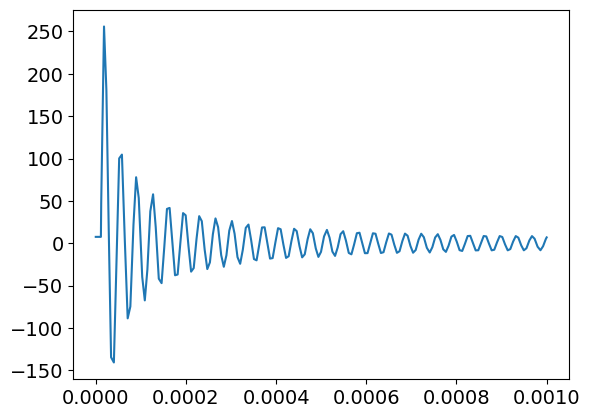

In [6]:
control_step = 6
plt.plot(simulator.ode_results[control_step].t, simulator.ode_results[control_step].y[1,:])

Total objective: 1.92986
log date and time = 2024-03-20_163701


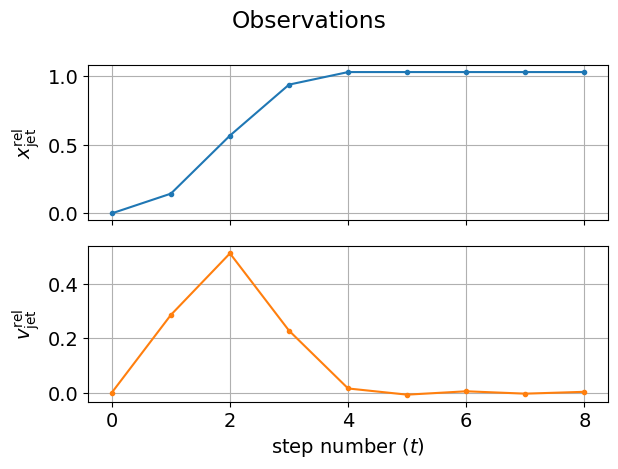

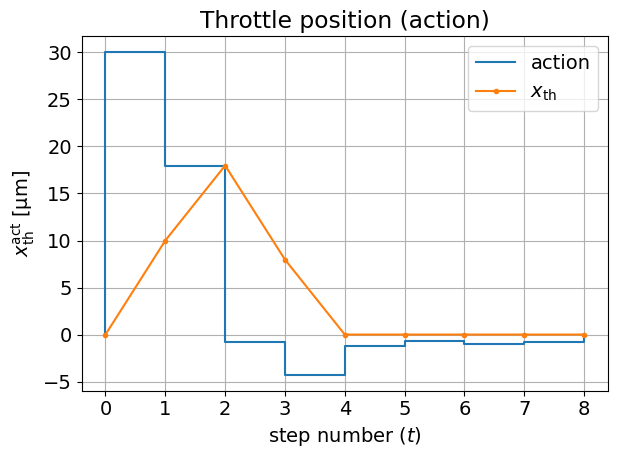

In [15]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=30,
    D_coef=27,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=True)

We get this non-linearity dependency because of Friction!

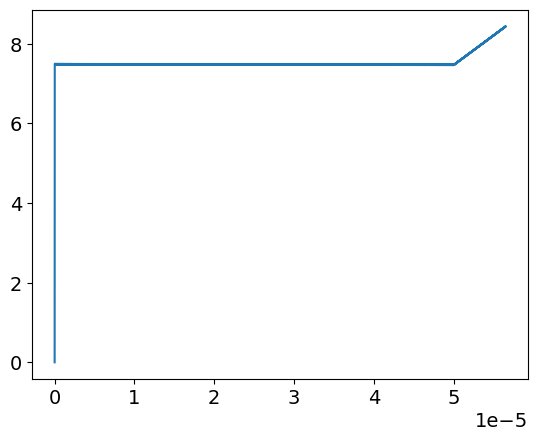

In [18]:
control_step = 1
time_limit = 10000
plt.plot(simulator.ode_results[control_step].t[:time_limit], simulator.ode_results[control_step].y[1,:time_limit])

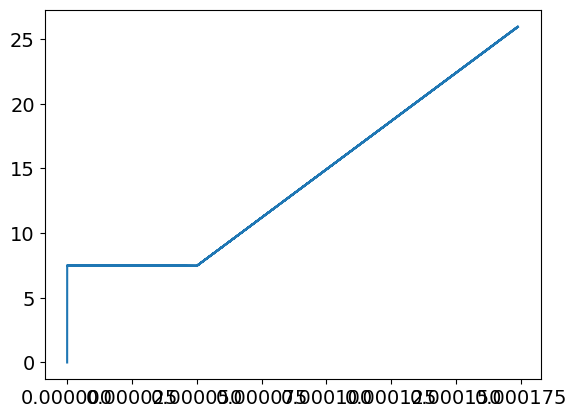

In [19]:
control_step = 1
time_limit = 20000
plt.plot(simulator.ode_results[control_step].t[:time_limit], simulator.ode_results[control_step].y[1,:time_limit])